### Pima Indian Diabetes Analysis

We will use logistic regression to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


<b>Data Dictionary</b>:

Preg: Number of times pregnant<br>
Plas: glucose concentration a 2 hours in an oral glucose tolerance test<br>
Pres: blood pressure (mm Hg)<br>
Skin: skin fold thickness (mm)<br>
test: 2-Hour serum insulin (mu U/ml)<br>
mass: BMI (weight in kg/(height in m)^2)<br>
pedi: pedigree function<br>
age: Age (years)<br>
Class: variable (0 or 1) 268 of 768 are 1, the others are 0<br>



## Import Libraries

In [282]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline #i dont av to use the plt.show befor displaying my plot; show my plot  
import seaborn as sns
from sklearn.metrics import precison_score, recall, f1_score 


UsageError: unrecognized arguments: #i dont av to use the plt.show befor displaying my plot; show my plot


In [283]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#to plot univariate and bivariate plot
from utils import histogram_boxplot, labeled_barplot

#to normalize the data
from sklearn.preprocessing import StandardScaler

In [284]:
from sklearn.metrics import (precision_score,
                           recall_score,
                           f1_score,
                           accuracy_score,
                           precision_recall_curve,
                           roc_auc_score,
                            confusion_matrix,
                            roc_curve, ConfusionMatrixDisplay)

## Load and review data

In [285]:
#path = r"C:\Users\ajayi\Downloads\pima-indians-diabetes.csv"

# load the data

df = pd.read_csv('pima-indians-diabetes.csv')
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [286]:
# Check number of columns and rows in data frame

df.shape

(768, 9)

In [287]:
# check first 5 rows of data set

df.head(5)
#As at time the datais being collated till time of use, the 4th observation showed there was pregnancy during the sampling periods 
#So learn to write story about the data  

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [288]:
# Check for missing values
df.isnull().sum()


Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [289]:
df.describe().T
#From the data we can see that preg nos can be 0 as min 
#Glucose conc can be 0 maybe 
#pressure level cant be except dead 
#skin fld level cant be 0 too 
#Test maybe come out 0 
#Mass cant be 0 too 
#pedi 
#We can rather treat this 0 which is not realisetic as missing values although missing value as NA isnt missing  

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Visualize the data

In [290]:
columns = list(df)[:-1]
df[columns].head(3)

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


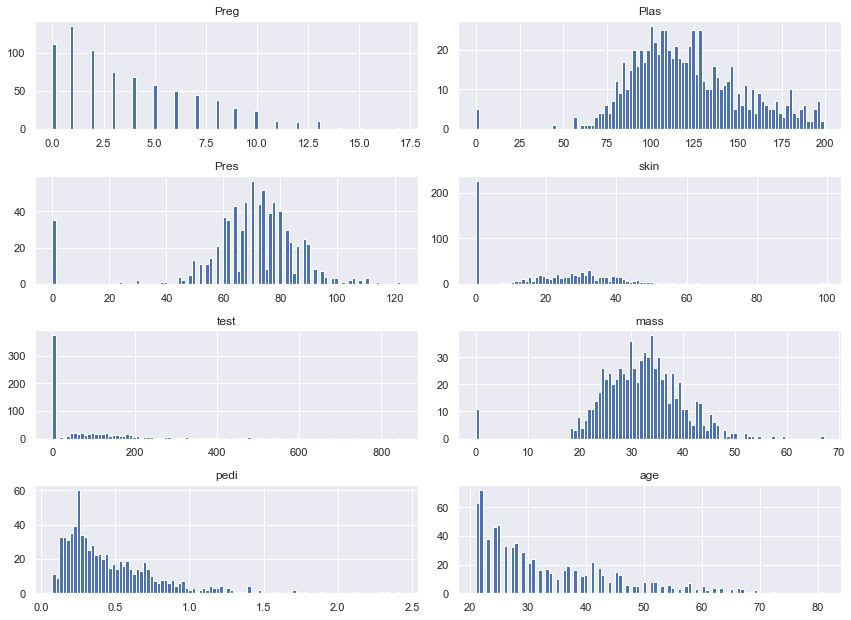

In [291]:
df[columns].hist(stacked = False, bins = 100, figsize = (12,30), layout = (14, 2))
plt.tight_layout();

## Identify Correlation in data 

In [292]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


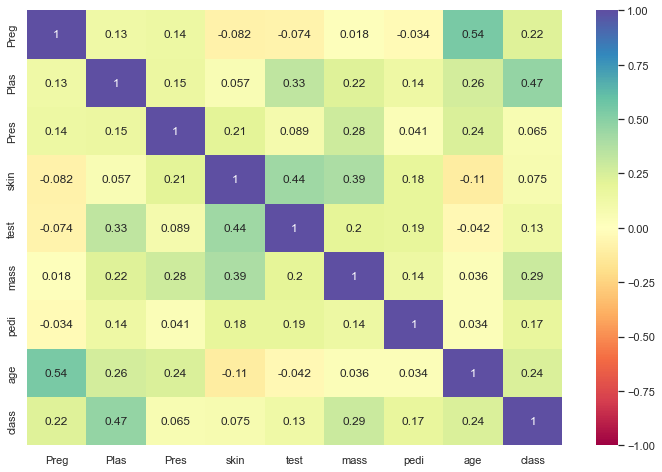

In [293]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, vmin =-1, vmax = 1,cmap = "Spectral"); 
#From here, we can see that there are no multicollineraity between the explanatory variable except for age/preg - 0.54  not too correlated 
#Above 0.75 can be a pointer  

## Calculate diabetes ratio of True/False from outcome variable 

In [294]:
df["class"].value_counts()
#As can see we are to predict cases for diabetic  i.e the Non diab as 0 and diab as 1, based on the value count, it might tend 
#to predict high value for the 0; hence, a data balacing reqired , a balaanced data will have equal no of female in both classes  

0    500
1    268
Name: class, dtype: int64

In [295]:
df["class"].value_counts(normalize = True) #BAsed on percentage  
#True = 1 (Predict diabetic - True )
#False = 0 ( Non diabetic - False  )

0    0.651042
1    0.348958
Name: class, dtype: float64

NOTE 

So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes. 

Its a good distribution True/False cases of diabetes in data.

## Spliting the data 
We will use 80% of data for training and 20% for testing.

In [296]:
from sklearn.model_selection  import train_test_split

In [297]:
x = df.drop("class", axis = 1)
y = df['class']

In [298]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
#Stratify is set too the target or class becasue we d want the same proportion of the 60/40 been splitted on the 80/20 as the train test split ration  

In [299]:
df["class"].value_counts(normalize = True)


0    0.651042
1    0.348958
Name: class, dtype: float64

##### stratify implications 

AS can see the percentage of class is a 60/40 ratio, so what the starify does is to maintain that same ratio of 60/40 of the y-split
As this is to maintain that same ratio in the 20% of 100% of the total observations 
Other optimizing techniques will then be used for better result 

In [300]:
y_train.value_counts(normalize = True) #As can see, the percentage split of the 80% and 20% on the train test split on the y is approx equal to the 60/40 ratio
#That is wat stratify does; if

0    0.651466
1    0.348534
Name: class, dtype: float64

In [301]:
y_test.value_counts(normalize = True)

0    0.649351
1    0.350649
Name: class, dtype: float64

# Data Preparation

### Check hidden missing values 

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

### Replace 0s with serial mean 

In [303]:
# check the descriptive statistics
#Recall that the missing values is represented by zero -0 based on this Dataset 

#### Impute missing values with mean
- Import SimpleImputer and transform train and test data




In [304]:
# Hence, we will get the imputer to run on the relevant columns only.
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [305]:
#Determine which column is not valid as per 0 as missing values 
#Preg is valid as min for 0 as we can have 0 nos preg during the tests sampling periods 
#Pedgree fxtn, skin fold,mass, age (incase 0 as min in nthe samples) 
#Median is resisitanace is to outlier as against the use of mean to replace missing values 

In [306]:
x.head().columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [307]:
#SInce the column to replace the min as 0 or as missing values is, 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi'

In [308]:
cols = list(x.drop(['Preg','age' ], axis = 1))
cols

['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi']

In [309]:
imp = SimpleImputer(missing_values = 0, strategy = 'median') #if we are to impute truly missing value, missing_value will be np.nan
#x_train is the dataframe containing the all the data minus the target  but for y_train is that which contains the target 
x_train[cols].head(2) #Datacolumn to impute on 

,Plas,Pres,skin,test,mass,pedi
22,196,90,0,0,39.8,0.451
497,81,72,15,76,30.1,0.547


In [310]:
x_train[cols] = imp.fit_transform(x_train[cols])
x_test[cols] = imp.transform(x_test[cols])

In [311]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,614.0,3.982085,3.430694,0.000,1.0000,3.0000,6.000,17.00
Plas,614.0,121.640065,29.980675,44.000,100.0000,118.0000,139.750,199.00
Pres,614.0,72.703583,12.291461,24.000,65.0000,72.0000,80.000,122.00
skin,614.0,29.768730,8.863581,7.000,26.0000,30.0000,33.000,99.00
test,614.0,139.392508,84.507646,14.000,125.5000,125.5000,125.500,846.00
mass,614.0,32.366775,6.772832,18.200,27.5000,32.0000,36.300,67.10
pedi,614.0,0.477850,0.342000,0.078,0.2415,0.3745,0.618,2.42
age,614.0,33.558632,11.884531,21.000,24.0000,30.0000,41.000,81.00


## Normalise 

In [312]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

# Logistic Regression

In [313]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_sc, y_train)

LogisticRegression()

In [314]:
#THis is the training and testing accuracy on both the teste and the train but of concern is majorly on the test except for underfitting and overfitting  
print("Train Performace: {:.3f}".format(log_reg.score(x_train_sc, y_train)))
print("Test Performace: {:.3f}".format(log_reg.score(x_test_sc, y_test)))

Train Performace: 0.770
Test Performace: 0.773


#### THis is saying, under the same data distribution, the accuracy of test being 77.3% means that, the model will be able to predict
correctly 77% of the time  

When you have imbalance data, accuracy isnt the best bench to interprette your Data , the model can be accurate but on the majority class 

This is where confusion matric, recall came in, they came in because of imbaloance data 

Imbalance data occurs when you have more class than the other in the class of the target 

How do we deal with this 

- Change perforance metric 
- Change Algorithm 
-Resampling technique : Oversampling or Undersampling 
- SMOTE 

In [315]:
log_reg.coef_

array([[ 0.39458815,  1.00298618, -0.05306573,  0.06154125,  0.02115535,
         0.54203119,  0.28625423,  0.2181332 ]])

In [316]:
from sklearn.metrics import precision_score, recall_score

In [317]:
test_preds= log_reg.predict(x_test_sc)
precision = precision_score(y_test, test_preds)

In [318]:
precision  #Out of all the people that our model predicted to have cancer, only 74% truly had cancer  

0.7435897435897436

In [319]:
log_reg.score(x_test_sc, y_test)  #Accuracy 
#If we have a data similar to what we have or a similar distributiion, this model will predict accurately by 77% 

0.7727272727272727

In [320]:
log_reg.score(x_train_sc, y_train)

0.7703583061889251

### LOGISTIC REGRESSION

In [321]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(x_train_sc, y_train)

LogisticRegression(random_state=0)

In [322]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

#### function to train a model and compute accuracy 

In [323]:
def train_models(model, x , y):
    '''
    function to train the model and compute accuracy 
    model: model algorithm not yet trained 
    x: Train features
    y: Train Target 
    '''
    tm = model.fit(x,y)
    preds = model.predict(x) #Predicting the x_train_sc corresponmding value for the y_train 
    acc = model.score(x,y) #x_train_sc & y_train
    accuracy  = accuracy_score(y, preds) # predicted based x_train_sc and check accuracy against the label y_train; to check for the test
    #u can make the parameters more than x, y rather a , b  
    print(acc, accuracy)
  
    return tm
    

In [324]:
def train(model, x , y):
    '''
    function to train the model and compute accuracy 
    model: model algorithm not yet trained 
    x: Train features
    y: Train Target 
    '''
    trained_model = model.fit(x,y)
    preds = trained_model.predict(x)
    acc = accuracy_score(y, preds)
    print(f"Train Accuracy: {acc}")
    return trained_model 

In [325]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],)
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

In [326]:
log_reg_model = train(log_reg, x_train_sc, y_train)

Train Accuracy: 0.7703583061889251


In [327]:
log_reg_model = train_models(log_reg, x_train_sc, y_train) #log_reg_model is our trained model  

0.7703583061889251 0.7703583061889251


In [328]:
#def train_modelly(model, x , y, a, b ):
    #function to train the model and compute accuracy 
    #model: model algorithm not yet trained 
    #x: Train features
    #y: Train Target 
    #a: Test features 
    #b: Test Target 
    #tm = model.fit(x,y)
    #preds = model.predict(x)
    #preds_test = model.predict(a)
    #acc = model.score(x,y) #x_train_sc & y_train; this will give same result as accuracy_score 
    #accuracy_test  = accuracy_score(a, b) # predicted based x_train_sc and check accuracy against the label y_train; to check for the test
    #u can make the parameters more than x, y rather a , b  
    #print(acc, accuracy)
    #return tm
    

In [329]:
#Function to evaluate the model and compute metrics on test Data 
def evaluate (model, x, y, threshold = 0.5):
    """ function to evaluate our trained model with different metrics 
    model : Trained Model (classifier)
    
    x:validation features 
    y: Target in validation data 
    Threshold: Value to filter predictions 
    """
    
    pred_proba = model.predict_proba(x)[:, 1] #This will return x 2 array where the 2 is column with prob for the 
    pred_class = np.round(pred_proba  > threshold ) #This converts to 0 or 1 
    acc = accuracy_score (y, pred_class)
    recall = recall_score(y, pred_class)
    precision = precision_score (y, pred_class)
    f1 = f1_score (y, pred_class)
    
    df = pd.DataFrame({ "Accuracy": acc, 
                       "Precision": precision, 
                       "Recall":recall,
                       "F1" : f1}, index = [0])
    conf = confusion_matrix(y, pred_class, labels = [0,1]) ##If the class is more than 2, then use 0, 1, 2 
    disp = ConfusionMatrixDisplay (conf, display_labels = [0,1]) #If the class is more than 2, then use 0, 1, 2 
    disp.plot()
    plt.show()
    return df 

In [330]:
log_reg_model.predict_proba(x_test_sc) #this will give probability of success and failure, so we can just use one of  the column 

array([[0.98554474, 0.01445526],
       [0.96692577, 0.03307423],
       [0.96988884, 0.03011116],
       [0.58616401, 0.41383599],
       [0.3208995 , 0.6791005 ],
       [0.96276189, 0.03723811],
       [0.20305248, 0.79694752],
       [0.97327708, 0.02672292],
       [0.91052422, 0.08947578],
       [0.73174421, 0.26825579],
       [0.81046796, 0.18953204],
       [0.92328551, 0.07671449],
       [0.92844683, 0.07155317],
       [0.84141443, 0.15858557],
       [0.58717818, 0.41282182],
       [0.94100514, 0.05899486],
       [0.59022159, 0.40977841],
       [0.6704897 , 0.3295103 ],
       [0.73022041, 0.26977959],
       [0.1237978 , 0.8762022 ],
       [0.86714391, 0.13285609],
       [0.67365416, 0.32634584],
       [0.35245614, 0.64754386],
       [0.60657601, 0.39342399],
       [0.52550605, 0.47449395],
       [0.44575022, 0.55424978],
       [0.18742473, 0.81257527],
       [0.90654667, 0.09345333],
       [0.94001192, 0.05998808],
       [0.90676096, 0.09323904],
       [0.

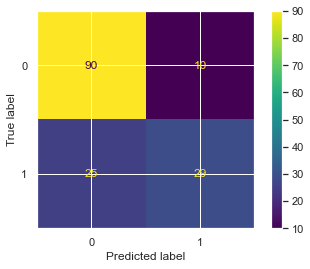

,Accuracy,Precision,Recall,F1
0,0.772727,0.74359,0.537037,0.623656


In [331]:
log_reg_df = evaluate (log_reg_model, x_test_sc, y_test)
log_reg_df

#Confusion Matrix Interpretation  
#1 - 1 : TP , 1-0: FP, 0-0: TN, 0-1: FN 
#Out of total prediction in the cancer class (1 class of True class): 54, 29nos were predicted right and 25 predicted wrong; for the Non-cancerous class
#90preicted right and 19 predicted wrong 


In [332]:
#Precision = TP/TP + FP = 29/29 + 10 = 29/39
#Recall = TP/TP + FN = 29/ 29 + 25     

### ROC - AUC 

In [333]:
preds = log_reg_model.predict_proba(x_test_sc)[:, 1] #recall that log_reg_model is like a train/fit part of training fucntion, so 
#u can call it up for predicting or even fitting again 
auc = roc_auc_score(y_test, preds)
auc  #Approximately, 88% of the time, the model will distinguish between those who have diab from those who dont have 

0.8753703703703704

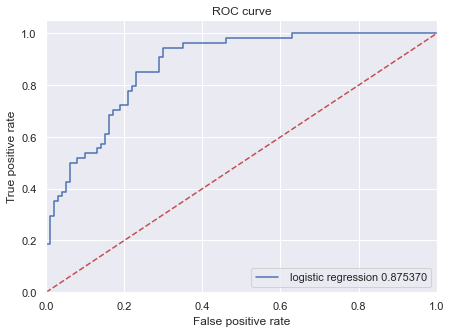

In [334]:
#auc = roc_auc_score(y_test, preds)
fpr, tpr, label = roc_curve(y_test, preds)
plt.figure(figsize = (7,5))
#here u r plotting the fpr against tpr and then label/axis labels according to the fpr and tpr from the fpr, tpr values from its calc above 
plt.plot(fpr, tpr, label = f" logistic regression {auc:2f}") 
plt.plot ([0,1], [0,1], "r--") #r--- is to make the line a broken dash lines, and plot the line with (1,0) for fpr and (0,1) for trp 
plt.xlim([0.0, 1.0]) #Making the plot more coloful  
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show;
          
          

In [335]:
#Lets create a function version of the graph plotting 

In [336]:
def draw_roc_curve(model, x, y):
    """
    Function to create ROC curve 
    
    Model: Trained Model 
    x: Trained or validation features 
    y: Target in the test data 
    
    """
    preds = model.predict_proba(x)[:, 1]
    auc = roc_auc_score(y, preds)
    fpr, tpr, thres = roc_curve(y_test, preds)
    plt.figure(figsize = (7,5))
    plt.plot(fpr, tpr, label = f" logistic regression {auc:2f}")
    plt.plot ([0,1], [0,1], "r--")
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend(loc = "lower right")
    plt.show()
    
    return thres, tpr, fpr 
    
          
          
    

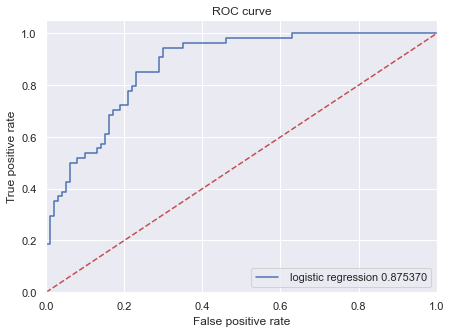

In [337]:
thres, tpr, fpr = draw_roc_curve(model = log_reg_model, x = x_test_sc, y = y_test)

In [338]:
thres

array([1.95960735, 0.95960735, 0.83166553, 0.83099693, 0.80861137,
       0.80316657, 0.76911438, 0.76149953, 0.74948239, 0.7273821 ,
       0.72003264, 0.70153346, 0.68108005, 0.6791005 , 0.6536498 ,
       0.64754386, 0.62464461, 0.55424978, 0.50247004, 0.47449395,
       0.474005  , 0.47157273, 0.4672299 , 0.45547   , 0.43629053,
       0.41529672, 0.40977841, 0.4036868 , 0.39342399, 0.38214432,
       0.37662704, 0.34236311, 0.33728294, 0.3295103 , 0.32634584,
       0.32114229, 0.30786101, 0.26110251, 0.24702079, 0.23592382,
       0.22780216, 0.21816573, 0.20664874, 0.15769408, 0.15254749,
       0.09906422, 0.09345333, 0.01445526])

Recall that the trp and fpr are indicatprs to determine the set of values that wil result to elbow which determine the best
set of vallues on the ROC curve that gives the TP rate and the False Positive rate

The implication of a high false positive rate is that on the other hand, we will have a low True negative value which isnt yet an optimum 
AUC value or elbow point that will give best class predictions.
However, recall that the difference bewteen tese points, if high infers that we have a high TPrate or a high TP predicted value and almost zero False potive 
values resulting to a better prediction on the positive class and better prediction on the negative class (TN); hence using the modellin approach, the optimal index will havce to be determine which will give point a value (assumed that the value will be the TPR value in the y axis where the x-axis is approximately 0 or not even neccessarily 0. 

So the corresponding value for the index will give the optimum value for the threshold, knowing that the threshold is a value in the y  which serves a separator which the the points in space are classified accoring to the regression line ( assumption ) 

In [339]:
#The threshold is like a divisor that divide the graph into two sides for prediction; hence we have TPrate and FPrates
#The argmax give the index corresponding to the TPr and FPr 
optimal_indx  = np.argmax(tpr - fpr) 
optimal_indx

40

In [340]:
optimal_thres = thres[optimal_indx]
optimal_thres 
#Optimal threshold with the optimal index above ( see index as a difference between the values in the (tpr,fpr) to give better scores)

0.22780215776273335

#### RE EVALUATE AT OPTIMUM VALUES OF THRESHOLD 

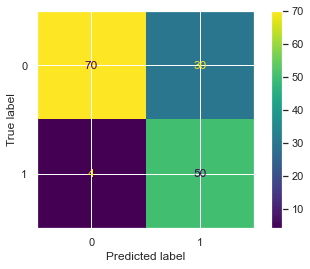

,Accuracy,Precision,Recall,F1
0,0.779221,0.625,0.925926,0.746269


In [341]:
evaluate (log_reg_model, x_test_sc, y_test,  0.22780215776273335)

#### MODEL IMPROVEMENT FROM MODEL HYPERPARAMETERS

In [342]:
#c_values = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [343]:
import random

random.seed(10)
c_val = np.random.rand(5,2).flatten() #Flatten makes it a single line values or a single row 
c_val

array([0.60526172, 0.29126706, 0.55231903, 0.96480646, 0.88450414,
       0.26391236, 0.58424811, 0.38247641, 0.26869036, 0.19219526])

In [344]:
accs = []
for c in c_val:
    model = LogisticRegression (C = c)
    model.fit(x_train_sc, y_train)
    acc = model.score(x_test_sc, y_test)
    accs.append(acc)

In [345]:
accs

[0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663,
 0.7727272727272727,
 0.7727272727272727,
 0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663]

In [346]:
# value for c
optimal_idx = np.argmax(accs)
optimal_c = c_val[optimal_idx]
optimal_c

0.9648064553150683

In [347]:
log_reg_c = LogisticRegression(random_state = 0, C= optimal_c)

In [348]:
log_reg_c_model = train(log_reg_c, x_train_sc, y_train)

Train Accuracy: 0.7687296416938111


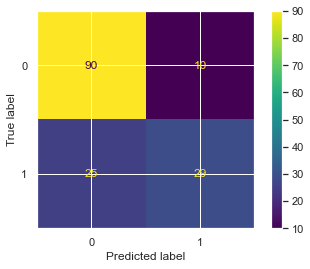

,Accuracy,Precision,Recall,F1
0,0.772727,0.74359,0.537037,0.623656


In [367]:
df_c = evaluate (log_reg_c_model , x_test_sc, y_test)
df_c

#### MODEL IMPROVEMENT FROM DATA 

In [350]:
!pip install imblearn

In [351]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 

In [352]:
def balance_data (x, y, smote_type):
    """x: Train features 
    y: Train Target 
    smote_ type : Kind of imbalance strategy 
    """
    x_res, y_res  = smote_type.fit_resample(x,y) 
    #Depending on the balancing technique,  x_res will be complemented by set of artficial data based on oversampling or any technic and our y_res will be also be balanced by same art datas 
    #If for Under samplimg x_res might be reduced from majority class so it can reduce to the minority class number 
    return x_res, y_res


In [353]:
under = RandomUnderSampler(random_state = 0)
over = RandomOverSampler(random_state = 0)
smote = SMOTE(random_state = 0)
adasyn = ADASYN(random_state = 0)

In [354]:
#Recall, its the train sets that will always require the balancing and scaling since its like a base line for predicting othher unseen data like the test sets 
x_train_un, y_train_un = balance_data(x_train_sc, y_train, under )
x_train_ov, y_train_ov = balance_data(x_train_sc, y_train, over )
x_train_sm, y_train_sm = balance_data(x_train_sc, y_train, smote )
x_train_ada, y_train_ada = balance_data(x_train_sc, y_train, adasyn)

In [355]:
#x_train_un, y_train_un = balance_data(x_train_sc, y_train, under )

In [356]:
#This is to confirm undersample as the y-class for the two classes will have equal proportion of the class 
from collections import Counter 

Counter(y_train_un)

Counter({0: 214, 1: 214})

Train Accuracy: 0.7453271028037384


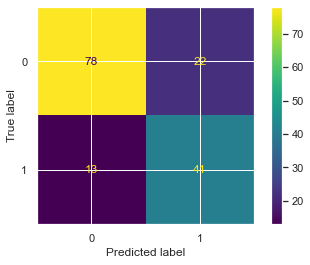

,Accuracy,Precision,Recall,F1
0,0.772727,0.650794,0.759259,0.700855


In [362]:
log_reg_un = train(log_reg, x_train_un, y_train_un)
df_un = evaluate(log_reg_un, x_test_sc, y_test)
df_un

Based on confusion matrix above, its is clear that of the people predicted to have diabetics with relative to actual or True values; 
and based on undersampling technique; of 54 predicted; 41 are correct and 13 are incorrect; of the 100Non diabetic class prediction; 
78 rightly predicxted and 22 wrngly 

In [2]:
#log_reg_ov = train(log_reg, x_train_ov, y_train_ov)
#df_ov = evaluate(log_reg_ov, x_test_sc, y_test)
#df_ov

Train Accuracy: 0.7525


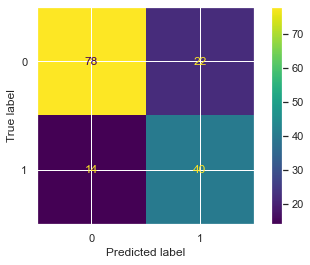

,Accuracy,Precision,Recall,F1
0,0.766234,0.645161,0.740741,0.689655


In [364]:
log_reg_sm = train(log_reg, x_train_sm, y_train_sm)
df_sm = evaluate(log_reg_sm, x_test_sc, y_test)
df_sm

Train Accuracy: 0.7118012422360248


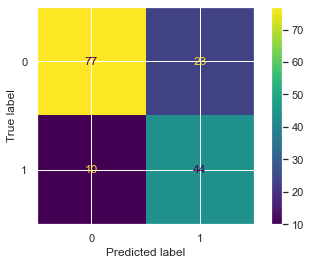

,Accuracy,Precision,Recall,F1
0,0.785714,0.656716,0.814815,0.727273


In [365]:
log_reg_ad = train(log_reg, x_train_ada, y_train_ada)
df_ad = evaluate(log_reg_ad, x_test_sc, y_test)
df_ad

#### CONCLUSION 

Based on Recall, ADASYN to be deployed 